In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# verify data
%ls drive/MyDrive/training_data/quadrant_enumeration/

coco_quadrant_enumeration_2048_1024.json  train_quadrant_enumeration.json  xrays_2048_2048/
coco_quadrant_enumeration_2048_2048.json  xrays/                           yolo_2048_2048/
explore_unet.pth                          xrays_2048_1024/


In [22]:
import os
import json
import numpy as np
from PIL import Image, ImageDraw

def create_tooth_masks(coco_json, image_dir, output_dir, image_size):
    """
    Create segmentation masks for individual teeth using category_id.

    Args:
        coco_json (str): Path to the COCO JSON file.
        image_dir (str): Directory containing the original images.
        output_dir (str): Directory to save the generated masks.
        image_size (tuple): Size of the output masks (width, height).
    """
    # Load COCO JSON file
    with open(coco_json, "r") as f:
        data = json.load(f)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Map image IDs to their file names
    image_id_to_file = {img["id"]: img["file_name"] for img in data["images"]}

    # Process each image
    for image in data["images"]:
        image_id = image["id"]
        image_name = image["file_name"]

        # Create a blank mask
        mask = Image.new("L", image_size, 32)  # Initialize with background (32)
        draw = ImageDraw.Draw(mask)

        # Get all annotations for this image
        for annotation in data["annotations"]:
            if annotation["image_id"] == image_id:
                category_id = annotation["category_id"]
                points = np.array(annotation["segmentation"]).reshape(-1, 2)
                points = [tuple(point) for point in points]

                # Draw the polygon with the category_id as the label
                draw.polygon(points, fill=category_id)

        # Save the mask
        mask.save(os.path.join(output_dir, os.path.splitext(image_name)[0] + ".png"))

    print(f"Masks saved to {output_dir}")





In [23]:
# ####### WARNING WRITES DATA #########
# base_dir = "drive/MyDrive/training_data/quadrant_enumeration"

# coco_json = os.path.join(base_dir, "coco_quadrant_enumeration_2048_1024.json")
# image_dir = os.path.join(base_dir, "xrays_2048_1024")
# output_dir = os.path.join(base_dir, "masks_teeth_2048_1024")
# image_size = (2048, 1024)

# create_tooth_masks(coco_json, image_dir, output_dir, image_size)

Masks saved to drive/MyDrive/training_data/quadrant_enumeration/masks_teeth_2048_1024


In [24]:
# ####### WARNING WRITES DATA #########
# base_dir = "drive/MyDrive/training_data/quadrant_enumeration"

# coco_json = os.path.join(base_dir, "coco_quadrant_enumeration_2048_2048.json")
# image_dir = os.path.join(base_dir, "xrays_2048_2048")
# output_dir = os.path.join(base_dir, "masks_teeth_2048_2048")
# image_size = (2048, 2048)

# create_tooth_masks(coco_json, image_dir, output_dir, image_size)

Masks saved to drive/MyDrive/training_data/quadrant_enumeration/masks_teeth_2048_2048


In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.colors as mcolors

def visualize_mask(mask_path, title="Mask Visualization"):
    """
    Visualize a segmentation mask with a different color for each label.

    Args:
        mask_path (str): Path to the mask file (grayscale PNG).
        title (str): Title for the visualization.
    """
    # Load the mask
    mask = Image.open(mask_path)
    mask = np.array(mask)  # Convert to NumPy array

    # Generate a colormap with distinct colors for each class
    num_classes = mask.max() + 1  # Assuming labels start from 0
    cmap = plt.cm.get_cmap("tab20", num_classes)  # Use tab20 for up to 20 classes

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(mask, cmap=cmap, interpolation="nearest")

    # Add a colorbar
    cbar = fig.colorbar(
        plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=0, vmax=num_classes - 1)),
        ax=ax,
        ticks=range(num_classes),
        fraction=0.046, pad=0.04
    )
    cbar.ax.set_ylabel("Class Labels", rotation=-90, va="bottom")

    # Set plot details
    ax.set_title(title)
    ax.axis("off")
    plt.show()



<ipython-input-30-4407c805719a>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_classes)  # Use tab20 for up to 20 classes


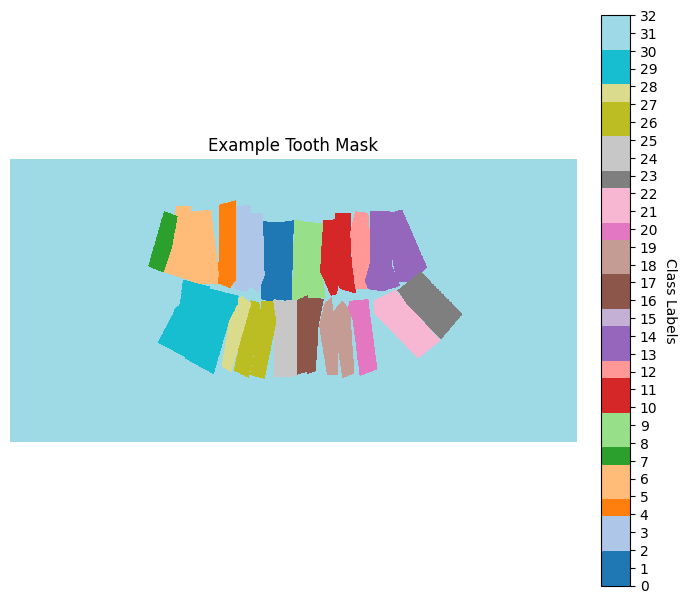

In [31]:
### Validate
mask_path = "drive/MyDrive/training_data/quadrant_enumeration/masks_teeth_2048_1024/train_0.png"
visualize_mask(mask_path, title="Example Tooth Mask")

<ipython-input-30-4407c805719a>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_classes)  # Use tab20 for up to 20 classes


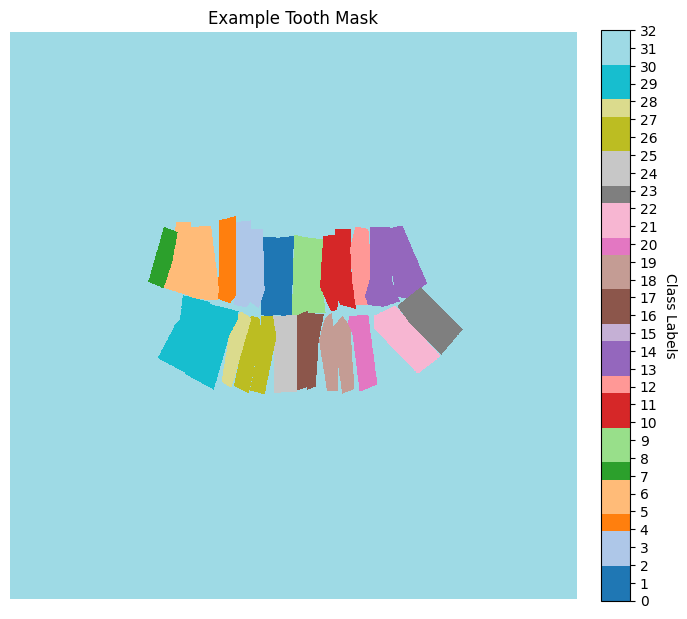

In [32]:
### Validate
mask_path = "drive/MyDrive/training_data/quadrant_enumeration/masks_teeth_2048_2048/train_0.png"
visualize_mask(mask_path, title="Example Tooth Mask")

# Quadrant Masks

In [34]:
import os
import json
import numpy as np
from PIL import Image, ImageDraw

def create_quadrant_masks(coco_json, image_dir, output_dir, image_size):
    """
    Create segmentation masks for individual teeth using category_id.

    Args:
        coco_json (str): Path to the COCO JSON file.
        image_dir (str): Directory containing the original images.
        output_dir (str): Directory to save the generated masks.
        image_size (tuple): Size of the output masks (width, height).
    """
    # Load COCO JSON file
    with open(coco_json, "r") as f:
        data = json.load(f)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Map image IDs to their file names
    image_id_to_file = {img["id"]: img["file_name"] for img in data["images"]}

    # Process each image
    for image in data["images"]:
        image_id = image["id"]
        image_name = image["file_name"]

        # Create a blank mask
        mask = Image.new("L", image_size, 32)  # Initialize with background (32)
        draw = ImageDraw.Draw(mask)

        # Get all annotations for this image
        for annotation in data["annotations"]:
            if annotation["image_id"] == image_id:
                category_id = annotation["category_id_1"]
                points = np.array(annotation["segmentation"]).reshape(-1, 2)
                points = [tuple(point) for point in points]

                # Draw the polygon with the category_id as the label
                draw.polygon(points, fill=category_id)

        # Save the mask
        mask.save(os.path.join(output_dir, os.path.splitext(image_name)[0] + ".png"))

    print(f"Masks saved to {output_dir}")





In [35]:
# ####### WARNING WRITES DATA #########
# base_dir = "drive/MyDrive/training_data/quadrant_enumeration"

# coco_json = os.path.join(base_dir, "coco_quadrant_enumeration_2048_1024.json")
# image_dir = os.path.join(base_dir, "xrays_2048_1024")
# output_dir = os.path.join(base_dir, "masks_quadrant_2048_1024")
# image_size = (2048, 1024)

# create_quadrant_masks(coco_json, image_dir, output_dir, image_size)

Masks saved to drive/MyDrive/training_data/quadrant_enumeration/masks_quadrant_2048_1024


In [36]:
# ####### WARNING WRITES DATA #########
# base_dir = "drive/MyDrive/training_data/quadrant_enumeration"

# coco_json = os.path.join(base_dir, "coco_quadrant_enumeration_2048_2048.json")
# image_dir = os.path.join(base_dir, "xrays_2048_2048")
# output_dir = os.path.join(base_dir, "masks_quadrant_2048_2048")
# image_size = (2048, 2048)

# create_quadrant_masks(coco_json, image_dir, output_dir, image_size)

Masks saved to drive/MyDrive/training_data/quadrant_enumeration/masks_quadrant_2048_2048


<ipython-input-30-4407c805719a>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_classes)  # Use tab20 for up to 20 classes


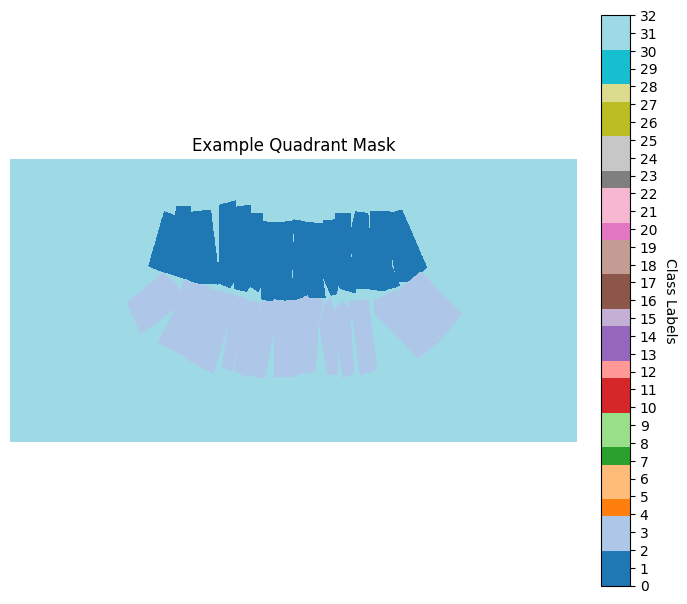

In [37]:
### Validate
mask_path = "drive/MyDrive/training_data/quadrant_enumeration/masks_quadrant_2048_1024/train_0.png"
visualize_mask(mask_path, title="Example Quadrant Mask")

<ipython-input-30-4407c805719a>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_classes)  # Use tab20 for up to 20 classes


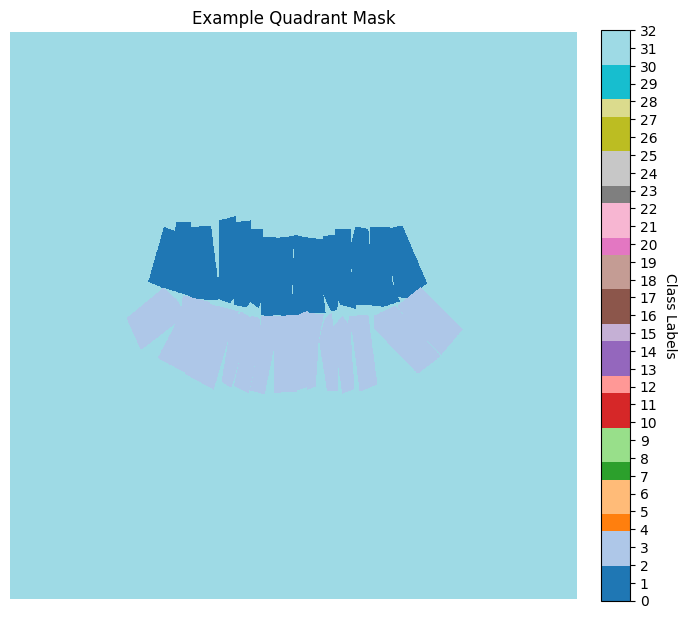

In [38]:
### Validate
mask_path = "drive/MyDrive/training_data/quadrant_enumeration/masks_quadrant_2048_2048/train_0.png"
visualize_mask(mask_path, title="Example Quadrant Mask")